In [1]:
# Import Libraries

import pandas as pd  
import numpy as np          
import seaborn as sns 
import matplotlib.pyplot as plt          


In [2]:
data = pd.read_csv("kids_meal_sample_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_timestamp  100 non-null    object
 1   child_name       100 non-null    object
 2   meal_type        100 non-null    object
 3   food             100 non-null    object
 4   amount_consumed  100 non-null    int64 
 5   care_giver       100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [3]:
data.head()

,event_timestamp,child_name,meal_type,food,amount_consumed,care_giver
0,2024-12-31T22:17:43.358646,Essence,dinner,Sandwich,87,Nahja
1,2025-01-29T02:30:43.358646,Gabriella,lunch,Pasta,59,Nahja
2,2024-12-19T07:38:43.358646,Essence,breakfast,Oatmeal,31,Nahja
3,2025-03-14T00:00:43.358646,Gabriella,breakfast,Pasta,55,Gabriel
4,2025-10-04T13:17:43.358646,Essence,lunch,Chicken,21,Nahja


In [4]:
data.columns = data.columns.str.lower().str.strip()
data.columns

Index(['event_timestamp', 'child_name', 'meal_type', 'food', 'amount_consumed',
       'care_giver'],
      dtype='object')

In [5]:
data = data.dropna()

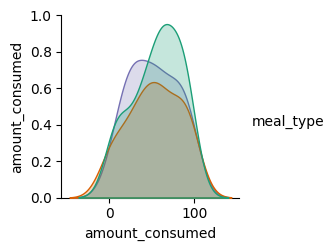

In [6]:
# plt.figure(figsize=(8,6))
sns.pairplot(data = data, hue='meal_type', palette="Dark2")
plt.show()

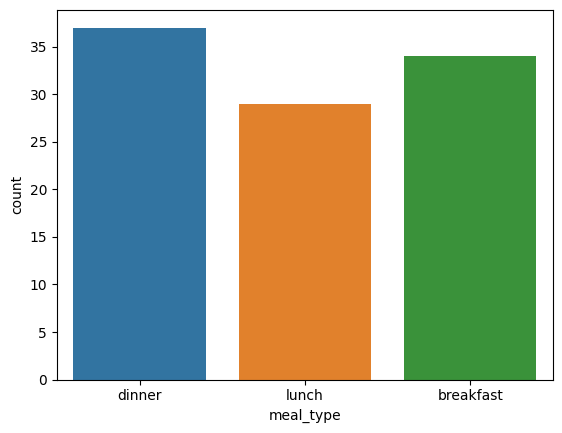

In [7]:
sns.countplot(data=data, x="meal_type", hue="meal_type")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split     

# Recommendation Algorithm 🌞🌤️

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_timestamp  100 non-null    object
 1   child_name       100 non-null    object
 2   meal_type        100 non-null    object
 3   food             100 non-null    object
 4   amount_consumed  100 non-null    int64 
 5   care_giver       100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [64]:
mymeals = list(data["meal_type"].unique())
dxmeals = [n.lower() for n in mymeals]


if "lunch" in dxmeals:
    print("present")

present


In [10]:
def simple_recommendation(df,child_name, meal_type, min_perecent=70, top_n=5):
    dfx = df[(df["child_name"] == child_name) & (df["meal_type"] == meal_type)]
    
    grouped = (
        dfx.groupby("food")["amount_consumed"]
        .mean()
        .reset_index()
        .rename(columns = {"amount_consumed":"avg_percent"})   
    )
    
    good = grouped[grouped["avg_percent"] >= min_perecent]
    return good.sort_values("avg_percent", ascending=False).head(top_n)

In [12]:
result = simple_recommendation(data, "Essence", "dinner", min_perecent=70, top_n=5)

In [13]:
print(result["food"].tolist())
summary_list = result["food"].tolist()

['Rice', 'Yogurt', 'Eggs']


In [ ]:
meal_type = "Breakfast"
summary_list = result["food"].tolist()

f"For {meal_type}, try:some {summary_list[0]}, {summary_list[1]} and {summary_list[2]}"

'For Breakfast, try Rice, Yogurt and Eggs'

In [41]:
# Import Libraries

import streamlit as st   
import numpy as np              
import pandas as pd                   
import matplotlib.pyplot as plt         
from dotenv import load_dotenv
import os          
from datetime import datetime 
from openai import OpenAI

load_dotenv()

# Check ENV variables

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# ----------------------------------------
if OPENAI_API_KEY:
    print("Key Successfully Loaded ✅")
else:
    print("Key Not Loaded Successfully 😔")

Key Successfully Loaded ✅


In [46]:
from openai import OpenAI
import streamlit as st

def call_chatgpt_mini(summary_list, user_query=None):
    
    client = OpenAI(api_key=OPENAI_API_KEY)

    history_text = ", ".join(summary_list)

    system_prompt = (
        "You are a friendly assistant that suggests kids' meals based on foods they "
        "have eaten before. You should keep answers short, practical, and reassuring."
    )

    if not user_query:
        user_query = "Suggest a meal idea for the child based on this history."

    user_prompt = f"""
Parent question: {user_query}

History of foods:
{history_text}

Based on this, suggest 2–3 foods the child is likely to eat well.
Mention the foods directly.
"""

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user",  "content": user_prompt},
        ],
        max_tokens=50,
        temperature=0.6,
    )

    return completion.choices[0].message.content


In [47]:
call_chatgpt_mini(summary_list, user_query=None)

'How about trying a **fried rice** with scrambled **eggs** and some peas? You could also serve it with a side of **yogurt** for dipping or as a dessert. Another option could be a **rice bowl** topped with'

In [21]:
data.groupby("food")["amount_consumed"].mean().reset_index().sort_values("amount_consumed", ascending=False)

,food,amount_consumed
0,Cereal,68.250000
3,Fruit Bowl,67.833333
2,Eggs,59.125000
7,Rice,52.923077
9,Yogurt,51.600000
8,Sandwich,51.333333
4,Oatmeal,45.875000
6,Pizza,45.600000
1,Chicken,44.750000
5,Pasta,43.500000


In [52]:
from openai import OpenAI
client = OpenAI()

meal_type = "Breakfast"
summary_list = ["oatmeal", "yogurt", "bananas"]  # result["food"].tolist()

foods_str = ", ".join(summary_list[:-1]) + f" and {summary_list[-1]}"

prompt = f"""
You are a helpful assistant.

Return ONE short sentence recommending these foods for a meal.

Meal type: {meal_type}
Foods: {foods_str}

Rules:
- Answer with ONE sentence only.
- Do not add extra explanation.
"""

response = client.chat.completions.create(
    model="gpt-4.1-mini",  # or "chatgpt-mini" depending on your setup
    messages=[{"role": "user", "content": prompt}],
    temperature=0.2,
    max_tokens=40,
)

print(response.choices[0].message.content.strip())


Oatmeal, yogurt, and bananas make a nutritious and energizing breakfast.


# Others for Exploration

In [ ]:
import streamlit as st
import sqlite3
import pandas as pd
from datetime import datetime

# --------------------
# CONFIG
# --------------------
DB_PATH = "meals.db"
DEFAULT_KIDS = ["Lucy", "Nahja"]  # you can add more here


# --------------------
# DATABASE HELPERS
# --------------------
def get_connection():
    return sqlite3.connect(DB_PATH, check_same_thread=False)


def init_db():
    conn = get_connection()
    c = conn.cursor()
    c.execute(
        """
        CREATE TABLE IF NOT EXISTS meals (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            kid_name TEXT,
            timestamp TEXT,
            meal_type TEXT,
            food TEXT,
            eat_percent REAL,
            notes TEXT
        )
        """
    )
    conn.commit()
    conn.close()


def insert_meal(kid_name, timestamp, meal_type, food, eat_percent, notes):
    conn = get_connection()
    c = conn.cursor()
    c.execute(
        """
        INSERT INTO meals (kid_name, timestamp, meal_type, food, eat_percent, notes)
        VALUES (?, ?, ?, ?, ?, ?)
        """,
        (kid_name, timestamp, meal_type, food, eat_percent, notes),
    )
    conn.commit()
    conn.close()


def load_meals():
    conn = get_connection()
    df = pd.read_sql_query("SELECT * FROM meals", conn)
    conn.close()

    if not df.empty:
        # Ensure timestamp is datetime
        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    return df


# --------------------
# RECOMMENDATION LOGIC
# --------------------
def get_recommendations(df, kid_name=None, meal_type=None, min_count=2):
    """
    Aggregate foods and rank them by average percentage eaten.
    """
    if df.empty:
        return pd.DataFrame()

    dfx = df.copy()

    if kid_name:
        dfx = dfx[dfx["kid_name"] == kid_name]
    if meal_type:
        dfx = dfx[dfx["meal_type"] == meal_type]

    if dfx.empty:
        return pd.DataFrame()

    grouped = (
        dfx.groupby("food")
        .agg(
            times_offered=("food", "count"),
            avg_percent=("eat_percent", "mean"),
        )
        .reset_index()
    )

    grouped = grouped[grouped["times_offered"] >= min_count]

    grouped = grouped.sort_values(
        by=["avg_percent", "times_offered"], ascending=False
    )

    return grouped


# --------------------
# OPTIONAL: AI HELPER
# --------------------
def parse_query(query, kids):
    """
    Very simple heuristic to extract kid_name and meal_type from free text.
    Example: "Lucy lunch" or "What should I give Nahja for breakfast?"
    """
    q = query.lower()
    meal_type = None
    kid_name = None

    # Meal detection
    if "breakfast" in q:
        meal_type = "breakfast"
    elif "lunch" in q:
        meal_type = "lunch"
    elif "dinner" in q or "supper" in q:
        meal_type = "dinner"
    elif "snack" in q:
        meal_type = "snack"

    # Kid detection
    for k in kids:
        if k.lower() in q:
            kid_name = k
            break

    return kid_name, meal_type


def ai_recommendation_ui(df):
    """
    Simple AI recommender section.
    Requires OPENAI_API_KEY in st.secrets.
    """
    try:
        from openai import OpenAI
    except ImportError:
        st.error(
            "The 'openai' package is not installed. "
            "Add 'openai' to requirements.txt if you want AI recommendations."
        )
        return

    if "OPENAI_API_KEY" not in st.secrets:
        st.warning(
            "No OPENAI_API_KEY found in Streamlit secrets. "
            "Set it in .streamlit/secrets.toml or in Streamlit Cloud."
        )
        return

    client = OpenAI(api_key=st.secrets["OPENAI_API_KEY"])

    st.header("🤖 AI Food Recommender")

    if df.empty:
        st.info("No meal data yet. Log some meals first.")
        return

    user_query = st.text_input(
        "Ask something like: 'Lucy lunch' or 'What should I give Nahja for breakfast?'",
        "",
    )

    if st.button("Get AI suggestion") and user_query.strip():
        kid_name, meal_type = parse_query(user_query, DEFAULT_KIDS)

        if kid_name is None and meal_type is None:
            st.warning(
                "I couldn't detect a child or meal type. "
                "Try including the kid's name and meal type, e.g. 'Lucy lunch'."
            )
            return

        st.write("**Interpreted as:**")
        st.write(f"- Child: `{kid_name or 'any'}`")
        st.write(f"- Meal type: `{meal_type or 'any'}`")

        recs = get_recommendations(
            df,
            kid_name=kid_name,
            meal_type=meal_type,
            min_count=1,
        )

        if recs.empty:
            st.info(
                "Not enough history to give a data-based suggestion with these filters. "
                "Try logging more meals."
            )
            return

        top = recs.head(10)

        # Build a short context summary
        summary_lines = []
        for _, row in top.iterrows():
            summary_lines.append(
                f"- Food: {row['food']} | Times offered: {row['times_offered']} | "
                f"Average eaten: {row['avg_percent']:.1f}%"
            )
        summary_text = "\n".join(summary_lines)

        system_prompt = (
            "You are a helpful assistant that suggests kids' meals to parents. "
            "You base your suggestions on past foods the child has eaten and how much they ate. "
            "Higher percentages mean they ate most of the food; lower percentages mean they barely ate."
        )

        user_prompt = f"""
Parent question: {user_query}

Child: {kid_name or "unknown"}
Meal type: {meal_type or "any"}

Here is the child's food history with average percentages eaten:

{summary_text}

Using this history, suggest 2–3 meal ideas that are similar to foods they have eaten well in the past.
Explain briefly why you chose them, in friendly and supportive language.
Avoid suggesting foods they consistently ate very little of (low percentages).
"""

        with st.spinner("Thinking..."):
            completion = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_prompt},
                ],
                temperature=0.7,
            )

        reply = completion.choices[0].message.content

        st.subheader("AI Suggestion")
        st.write(reply)

        st.markdown("#### Data used for this suggestion")
        st.dataframe(top)


# --------------------
# MAIN APP
# --------------------
def main():
    st.set_page_config(page_title="Kids Meal Tracker", page_icon="🍽️")
    init_db()

    st.title("🍽️ Kids Meal Tracker & Recommender")

    page = st.sidebar.radio(
        "Navigate",
        ["Log Meal", "History", "Recommendations", "AI Recommender"],
    )

    if page == "Log Meal":
        st.header("Log a Meal")

        with st.form("meal_form"):
            kid_name = st.selectbox(
                "Child's name",
                DEFAULT_KIDS,
            )
            meal_type = st.selectbox(
                "Meal type",
                ["breakfast", "lunch", "dinner", "snack"],
            )
            food = st.text_area(
                "What did they eat?",
                "Oatmeal with banana",
            )
            eat_percent = st.slider(
                "About what percentage of the food did they eat?",
                min_value=0,
                max_value=100,
                value=75,
                step=5,
            )
            timestamp = st.datetime_input("Time", datetime.now())
            notes = st.text_area("Notes (optional)", "")

            submitted = st.form_submit_button("Save meal")

            if submitted:
                insert_meal(
                    kid_name=kid_name,
                    timestamp=timestamp.isoformat(),
                    meal_type=meal_type,
                    food=food.strip(),
                    eat_percent=float(eat_percent),
                    notes=notes.strip(),
                )
                st.success("Meal saved ✅")

    elif page == "History":
        st.header("Meal History")

        df = load_meals()
        if df.empty:
            st.info("No meals logged yet.")
        else:
            kids = ["All"] + sorted(df["kid_name"].dropna().unique().tolist())
            kid_filter = st.selectbox("Filter by child", kids)

            if kid_filter != "All":
                df = df[df["kid_name"] == kid_filter]

            meal_types = ["All"] + sorted(
                df["meal_type"].dropna().unique().tolist()
            )
            meal_filter = st.selectbox("Filter by meal type", meal_types)

            if meal_filter != "All":
                df = df[df["meal_type"] == meal_filter]

            # Date range filter
            if not df["timestamp"].isna().all():
                min_date = df["timestamp"].min().date()
                max_date = df["timestamp"].max().date()
                start_date, end_date = st.date_input(
                    "Filter by date range",
                    value=(min_date, max_date),
                )
                mask = (df["timestamp"].dt.date >= start_date) & (
                    df["timestamp"].dt.date <= end_date
                )
                df = df[mask]

            df_show = df.sort_values("timestamp", ascending=False)
            st.dataframe(df_show)

            # Optional: export to CSV
            csv = df_show.to_csv(index=False)
            st.download_button(
                "Download as CSV",
                data=csv,
                file_name="meals_history.csv",
                mime="text/csv",
            )

    elif page == "Recommendations":
        st.header("Food Recommendations (Data-Based)")

        df = load_meals()
        if df.empty:
            st.info("No meal data yet. Log some meals first.")
        else:
            kids = ["All"] + sorted(df["kid_name"].dropna().unique().tolist())
            kid_filter = st.selectbox("Child", kids)

            meal_types = ["Any"] + sorted(
                df["meal_type"].dropna().unique().tolist()
            )
            meal_filter = st.selectbox("Meal type", meal_types)

            if kid_filter == "All":
                kid_name = None
            else:
                kid_name = kid_filter

            if meal_filter == "Any":
                meal_type = None
            else:
                meal_type = meal_filter

            min_count = st.slider(
                "Minimum times a food must have been offered",
                1,
                5,
                2,
            )

            recs = get_recommendations(
                df,
                kid_name=kid_name,
                meal_type=meal_type,
                min_count=min_count,
            )

            if recs.empty:
                st.info(
                    "Not enough data to generate recommendations "
                    "with these filters yet."
                )
            else:
                st.subheader("Foods they tend to eat more of")
                recs["avg_percent"] = recs["avg_percent"].round(1)
                st.dataframe(recs)

    elif page == "AI Recommender":
        df = load_meals()
        ai_recommendation_ui(df)


if __name__ == "__main__":
    main()
